# Case Study:   Analyze survey data to predict how likely a client is to return to the Louisiana SPCA community clinic


In [1]:
# Rebecca Lewis 
# DSC 550 
# May 17, 2020 

In [2]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Step 1: Load the data
rawdata = pd.read_csv('SPCA_Clinic_Survey_Redacted.csv')
rawdata.head(5)

,Respondent ID,Collector ID,Start Date,End Date,Custom Data 1,How did you first hear about the Louisiana SPCA Community Clinic,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,What services did you receive?,Unnamed: 12,How likely are you to use the Community Clinic again?,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Additional feedback
0,NaN,NaN,NaN,NaN,NaN,Adopted from Louisiana SPCA,Google,Social media,In the news,From a friend,Other (please specify),Response,Other (please specify),Extremely likely,Very likely,Somewhat likely,Not so likely,Not at all likely,Open-Ended Response
1,1.148614e+10,212328902.0,4/8/2020 5:19,4/8/2020 5:20,NaN,Adopted from Louisiana SPCA,NaN,NaN,NaN,NaN,NaN,Other (please specify),Illness care,Extremely likely,NaN,NaN,NaN,NaN,Pretty good protocol during COVID-19.
2,1.148543e+10,212328902.0,4/7/2020 22:23,4/7/2020 22:24,NaN,NaN,NaN,NaN,NaN,From a friend,Donald Lofton,Wellness exam,NaN,Extremely likely,NaN,NaN,NaN,NaN,N/A
3,1.147681e+10,212328902.0,4/4/2020 18:46,4/4/2020 18:49,NaN,NaN,NaN,NaN,NaN,NaN,New Orleans native. SPCA has been around since...,Other (please specify),First time puppy visit,Extremely likely,NaN,NaN,NaN,NaN,It was a great experience!
4,1.147654e+10,212328902.0,4/4/2020 15:02,4/4/2020 15:04,NaN,NaN,NaN,NaN,NaN,From a friend,NaN,Spay/Neuter,NaN,NaN,NaN,Somewhat likely,NaN,NaN,"I took my small dog to get spayed, and althoug..."


In [4]:
#Step 2: Clean up headers and data to prepare for summarization and Graph ANalysis

#copy the dataframe to retain raw information
df = rawdata

#Need to replace the column names and remove the first row which only gives the different options for each question
#Rename current columns
df.columns = ['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'Custom Data 1','Ref_Adopter', 'Ref_Google', 
              'Ref_Social', 'Ref_News', 'Ref_Friend', 'Ref_Other', 'Service', 'Service_Other', 'ExtremeLikely',
               'VeryLikely', 'SomewhatLikely', 'NotSoLikely', 'NotAtAllLikely', 'Feedback']

#Now that columns are renamed, I can drop row 2
df.drop([0], inplace=True)

#shorten service types
df[['Service']] = df[['Service']].replace({"Other (please specify)": "Other"})
df[['Service']] = df[['Service']].replace({"Heartworm treatment": "Heartworm"})
df[['Service']] = df[['Service']].replace({"Wellness exam": "Wellness"})
df[['Service']] = df[['Service']].replace({"Dental cleaning": "Dental"})

df.head(5)


,Respondent ID,Collector ID,Start Date,End Date,Custom Data 1,Ref_Adopter,Ref_Google,Ref_Social,Ref_News,Ref_Friend,Ref_Other,Service,Service_Other,ExtremeLikely,VeryLikely,SomewhatLikely,NotSoLikely,NotAtAllLikely,Feedback
1,1.148614e+10,212328902.0,4/8/2020 5:19,4/8/2020 5:20,NaN,Adopted from Louisiana SPCA,NaN,NaN,NaN,NaN,NaN,Other,Illness care,Extremely likely,NaN,NaN,NaN,NaN,Pretty good protocol during COVID-19.
2,1.148543e+10,212328902.0,4/7/2020 22:23,4/7/2020 22:24,NaN,NaN,NaN,NaN,NaN,From a friend,Donald Lofton,Wellness,NaN,Extremely likely,NaN,NaN,NaN,NaN,N/A
3,1.147681e+10,212328902.0,4/4/2020 18:46,4/4/2020 18:49,NaN,NaN,NaN,NaN,NaN,NaN,New Orleans native. SPCA has been around since...,Other,First time puppy visit,Extremely likely,NaN,NaN,NaN,NaN,It was a great experience!
4,1.147654e+10,212328902.0,4/4/2020 15:02,4/4/2020 15:04,NaN,NaN,NaN,NaN,NaN,From a friend,NaN,Spay/Neuter,NaN,NaN,NaN,Somewhat likely,NaN,NaN,"I took my small dog to get spayed, and althoug..."
5,1.147411e+10,212328902.0,4/3/2020 14:17,4/3/2020 14:20,NaN,NaN,NaN,NaN,NaN,From a friend,NaN,Wellness,NaN,Extremely likely,NaN,NaN,NaN,NaN,Due to the covid 19 I am really in a bind for ...


In [5]:
#Step 3: Describe and summarize the data
print("Numerical Variable Statistics")
print(df.describe())

print("\nCategorical Variable Statistics")
print(df.describe(include=['O']))

print("\nService Type Count")
print(df.groupby('Service').count()[['Respondent ID']])


Numerical Variable Statistics
       Respondent ID  Collector ID  Custom Data 1
count   7.780000e+02         778.0            0.0
mean    1.065807e+10   212328902.0            NaN
std     4.101116e+08           0.0            NaN
min     1.006313e+10   212328902.0            NaN
25%     1.028849e+10   212328902.0            NaN
50%     1.060130e+10   212328902.0            NaN
75%     1.100854e+10   212328902.0            NaN
max     1.148614e+10   212328902.0            NaN

Categorical Variable Statistics
            Start Date         End Date                  Ref_Adopter  \
count              778              778                          167   
unique             777              776                            1   
top     7/4/2018 18:39  2/12/2019 18:23  Adopted from Louisiana SPCA   
freq                 2                2                          167   

       Ref_Google    Ref_Social     Ref_News     Ref_Friend  \
count          84            82           51            290   


In [6]:
# Step 4: Prepare data for Graph Analysis

# clean up referral variables

# Because they are already vectorized in their layout in separate columns and only contain two unique values, 
# I'm going to apply one hot encoding so that missing values are replaced by 0 and non null values are replace by 1 
# for Ref_Adopter, Ref_Google, Ref_Social,Ref_News, and Ref_Friend, Ref_Other.  Ref_other will be copied to another 
# column to retain the notes ust in case we need them later. Even though this step is technically feature extraction, 
# some sort of transformation is necessary to visualize the variables

df['Other_Notes'] = df['Ref_Other']

#get column names
column_names = df.iloc[:, 5:11].columns.values

for col in column_names:
    df.loc[df[col].notnull(), col] = 1    #replace non null with 1
    df.loc[df[col].isna(), col] = 0       #replace null with 0

df.head(5)

,Respondent ID,Collector ID,Start Date,End Date,Custom Data 1,Ref_Adopter,Ref_Google,Ref_Social,Ref_News,Ref_Friend,Ref_Other,Service,Service_Other,ExtremeLikely,VeryLikely,SomewhatLikely,NotSoLikely,NotAtAllLikely,Feedback,Other_Notes
1,1.148614e+10,212328902.0,4/8/2020 5:19,4/8/2020 5:20,NaN,1,0,0,0,0,0,Other,Illness care,Extremely likely,NaN,NaN,NaN,NaN,Pretty good protocol during COVID-19.,NaN
2,1.148543e+10,212328902.0,4/7/2020 22:23,4/7/2020 22:24,NaN,0,0,0,0,1,1,Wellness,NaN,Extremely likely,NaN,NaN,NaN,NaN,N/A,Donald Lofton
3,1.147681e+10,212328902.0,4/4/2020 18:46,4/4/2020 18:49,NaN,0,0,0,0,0,1,Other,First time puppy visit,Extremely likely,NaN,NaN,NaN,NaN,It was a great experience!,New Orleans native. SPCA has been around since...
4,1.147654e+10,212328902.0,4/4/2020 15:02,4/4/2020 15:04,NaN,0,0,0,0,1,0,Spay/Neuter,NaN,NaN,NaN,Somewhat likely,NaN,NaN,"I took my small dog to get spayed, and althoug...",NaN
5,1.147411e+10,212328902.0,4/3/2020 14:17,4/3/2020 14:20,NaN,0,0,0,0,1,0,Wellness,NaN,Extremely likely,NaN,NaN,NaN,NaN,Due to the covid 19 I am really in a bind for ...,NaN


In [7]:
# cleanup the return rating.
# these are also separated into separate columns so I will apply one hot encoding to these

#get column names
column_names = df.iloc[:, 13:18].columns.values

for col in column_names:
    df.loc[df[col].notnull(), col] = 1    #replace non null with 1
    df.loc[df[col].isna(), col] = 0       #replace null with 0

df.head(5)

,Respondent ID,Collector ID,Start Date,End Date,Custom Data 1,Ref_Adopter,Ref_Google,Ref_Social,Ref_News,Ref_Friend,Ref_Other,Service,Service_Other,ExtremeLikely,VeryLikely,SomewhatLikely,NotSoLikely,NotAtAllLikely,Feedback,Other_Notes
1,1.148614e+10,212328902.0,4/8/2020 5:19,4/8/2020 5:20,NaN,1,0,0,0,0,0,Other,Illness care,1,0,0,0,0,Pretty good protocol during COVID-19.,NaN
2,1.148543e+10,212328902.0,4/7/2020 22:23,4/7/2020 22:24,NaN,0,0,0,0,1,1,Wellness,NaN,1,0,0,0,0,N/A,Donald Lofton
3,1.147681e+10,212328902.0,4/4/2020 18:46,4/4/2020 18:49,NaN,0,0,0,0,0,1,Other,First time puppy visit,1,0,0,0,0,It was a great experience!,New Orleans native. SPCA has been around since...
4,1.147654e+10,212328902.0,4/4/2020 15:02,4/4/2020 15:04,NaN,0,0,0,0,1,0,Spay/Neuter,NaN,0,0,1,0,0,"I took my small dog to get spayed, and althoug...",NaN
5,1.147411e+10,212328902.0,4/3/2020 14:17,4/3/2020 14:20,NaN,0,0,0,0,1,0,Wellness,NaN,1,0,0,0,0,Due to the covid 19 I am really in a bind for ...,NaN


In [8]:
#Step 5: Display the resulting data
df.head(5)

,Respondent ID,Collector ID,Start Date,End Date,Custom Data 1,Ref_Adopter,Ref_Google,Ref_Social,Ref_News,Ref_Friend,Ref_Other,Service,Service_Other,ExtremeLikely,VeryLikely,SomewhatLikely,NotSoLikely,NotAtAllLikely,Feedback,Other_Notes
1,1.148614e+10,212328902.0,4/8/2020 5:19,4/8/2020 5:20,NaN,1,0,0,0,0,0,Other,Illness care,1,0,0,0,0,Pretty good protocol during COVID-19.,NaN
2,1.148543e+10,212328902.0,4/7/2020 22:23,4/7/2020 22:24,NaN,0,0,0,0,1,1,Wellness,NaN,1,0,0,0,0,N/A,Donald Lofton
3,1.147681e+10,212328902.0,4/4/2020 18:46,4/4/2020 18:49,NaN,0,0,0,0,0,1,Other,First time puppy visit,1,0,0,0,0,It was a great experience!,New Orleans native. SPCA has been around since...
4,1.147654e+10,212328902.0,4/4/2020 15:02,4/4/2020 15:04,NaN,0,0,0,0,1,0,Spay/Neuter,NaN,0,0,1,0,0,"I took my small dog to get spayed, and althoug...",NaN
5,1.147411e+10,212328902.0,4/3/2020 14:17,4/3/2020 14:20,NaN,0,0,0,0,1,0,Wellness,NaN,1,0,0,0,0,Due to the covid 19 I am really in a bind for ...,NaN


#### Step 6: Observations
- The target for training the model will be the Retention Ratings transformed to a single column in numerical form. The features will be the referral type and the service type.
- Overall most clients state they are likely to return.  We can review to see if any of the categorical variables influence that decision: by referral type and service
- There are 6 unique service types however when I see the top service for other, it states shots. Shots are considered wellness.  So some text analysis and recategorization could be considered  to determine if a better service category exists.  
- How will those who answered Somewhat Likely need to be handled?  Should they be excluded so we can get a clearer picture of those who would return versus those who would not?
- For people who stated they did not want to return, are any keywords in their feedback that could indicate any potential challenges that could be resolved to improve their client retention.


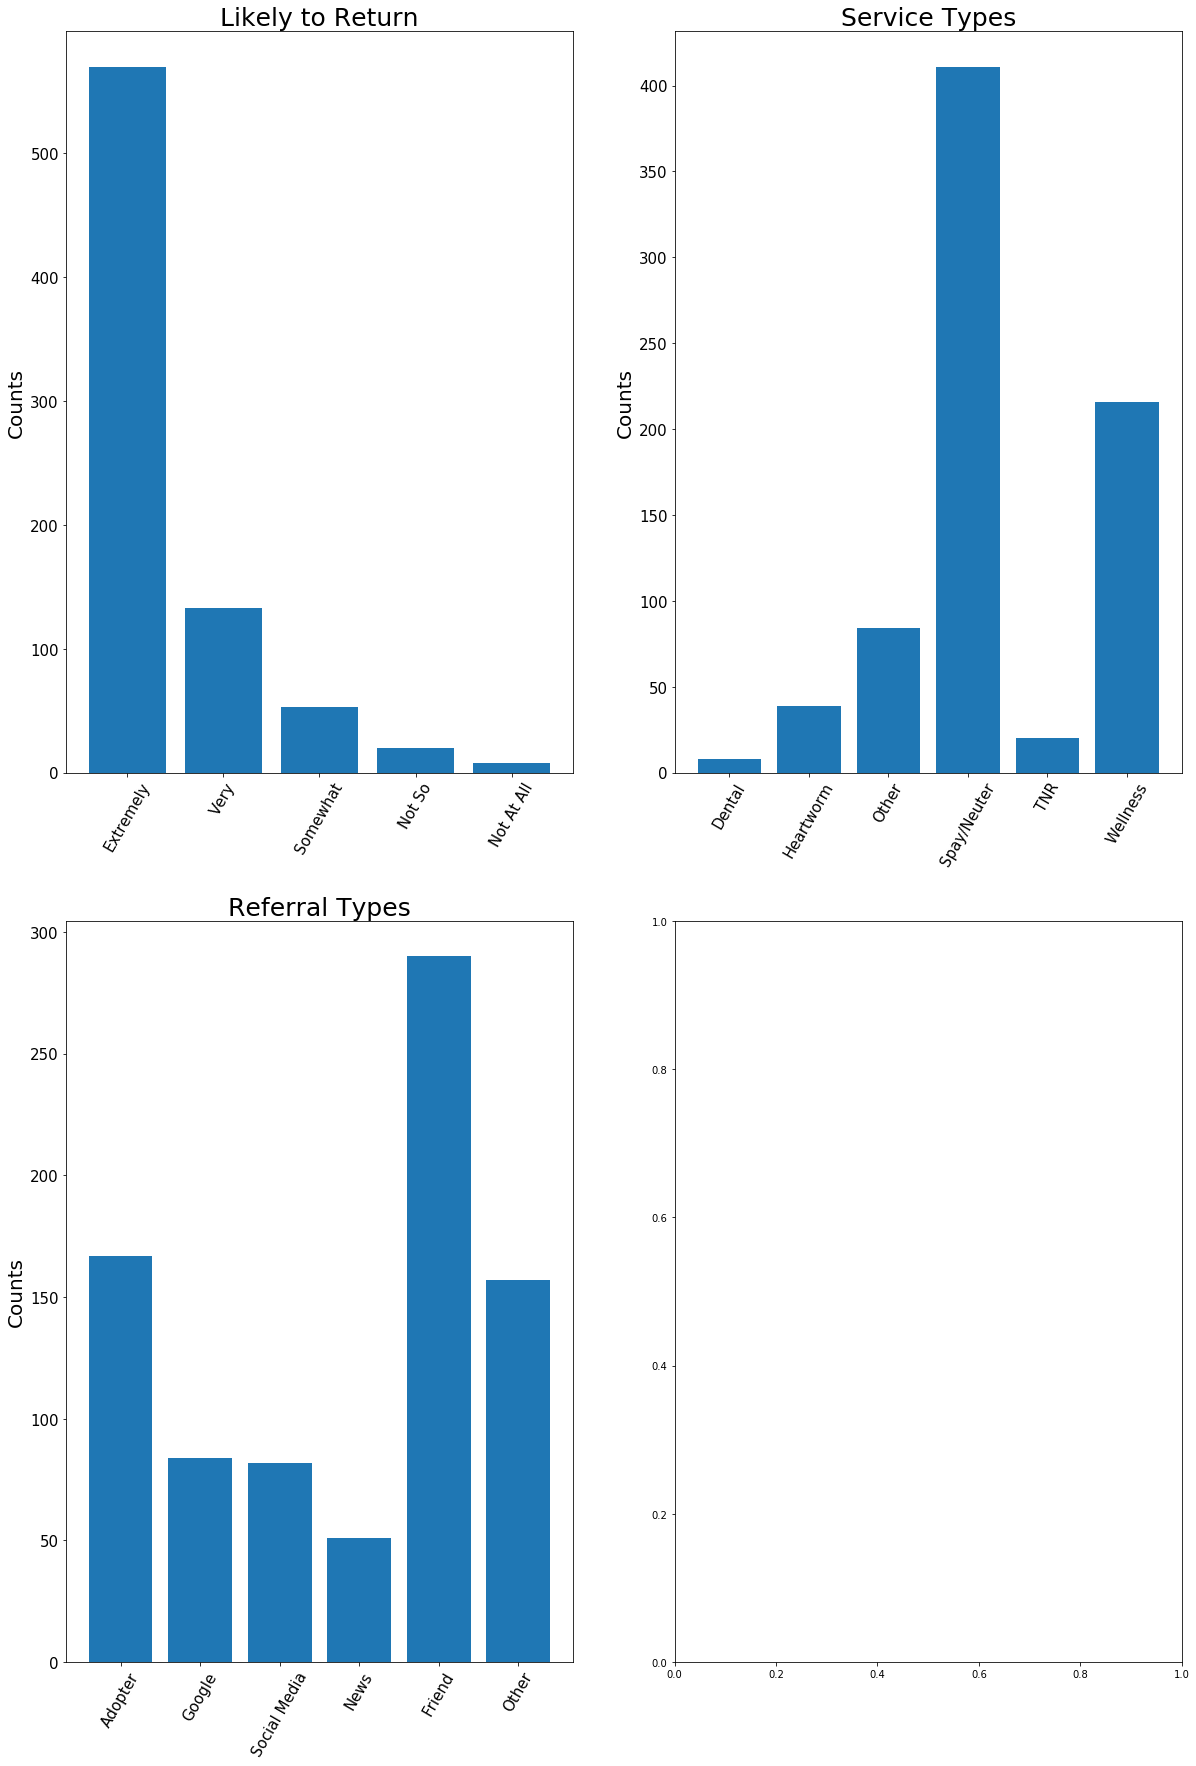

In [9]:
#Step 7: Graph the features

#prepare datasets for plotting
service = df.groupby('Service').count()[['Respondent ID']]
retention = df.iloc[:,13:18].sum().to_frame(name='Respondent ID')
referral = df.iloc[:, 5:11].sum().to_frame(name='Respondent ID')

referral_names = {'Ref_Friend':'Friend', 'Ref_Adopter': 'Adopter', 'Ref_Google':'Google', 'Ref_News': 'News', 
                 'Ref_Social':'Social Media', 'Ref_Other':'Other'}
referral = referral.transpose().rename(columns=referral_names).transpose()

retention_names = {'ExtremeLikely':'Extremely', 'VeryLikely': 'Very', 'SomewhatLikely':'Somewhat', 'NotSoLikely': 'Not So', 
                 'NotAtAllLikely':'Not At All'}
retention = retention.transpose().rename(columns=retention_names).transpose()

#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 30)


# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Retention = retention.index.values
Y_Retention = retention['Respondent ID'].values
# make the bar plot
axes[0,0].bar(X_Retention, Y_Retention)
axes[0,0].set_title('Likely to Return', fontsize=25)
axes[0,0].set_ylabel('Counts', fontsize=20)
axes[0,0].tick_params(axis='both', labelsize=15)
axes[0,0].tick_params(axis='x', labelrotation=60)


# make the data read to feed into the visulizer
X_Service = service.index.values
Y_Service = service['Respondent ID'].values
# make the bar plot
axes[0,1].bar(X_Service, Y_Service)
axes[0,1].set_title('Service Types', fontsize=25)
axes[0,1].set_ylabel('Counts', fontsize=20)
axes[0,1].tick_params(axis='both', labelsize=15)
axes[0,1].tick_params(axis='x', labelrotation=60)



# make the data read to feed into the visulizer
X_Referral = referral.index.values
Y_Referral = referral['Respondent ID'].values
# make the bar plot
axes[1,0].bar(X_Referral, Y_Referral)
axes[1,0].set_title('Referral Types', fontsize=25)
axes[1,0].set_ylabel('Counts', fontsize=20)
axes[1,0].tick_params(axis='both', labelsize=15)
axes[1,0].tick_params(axis='x', labelrotation=60)


#### Additional Observations
- I did not expect to see that most people were referred by friends.  I'm interested to see the percentage of those who were referred by friends who said they would return

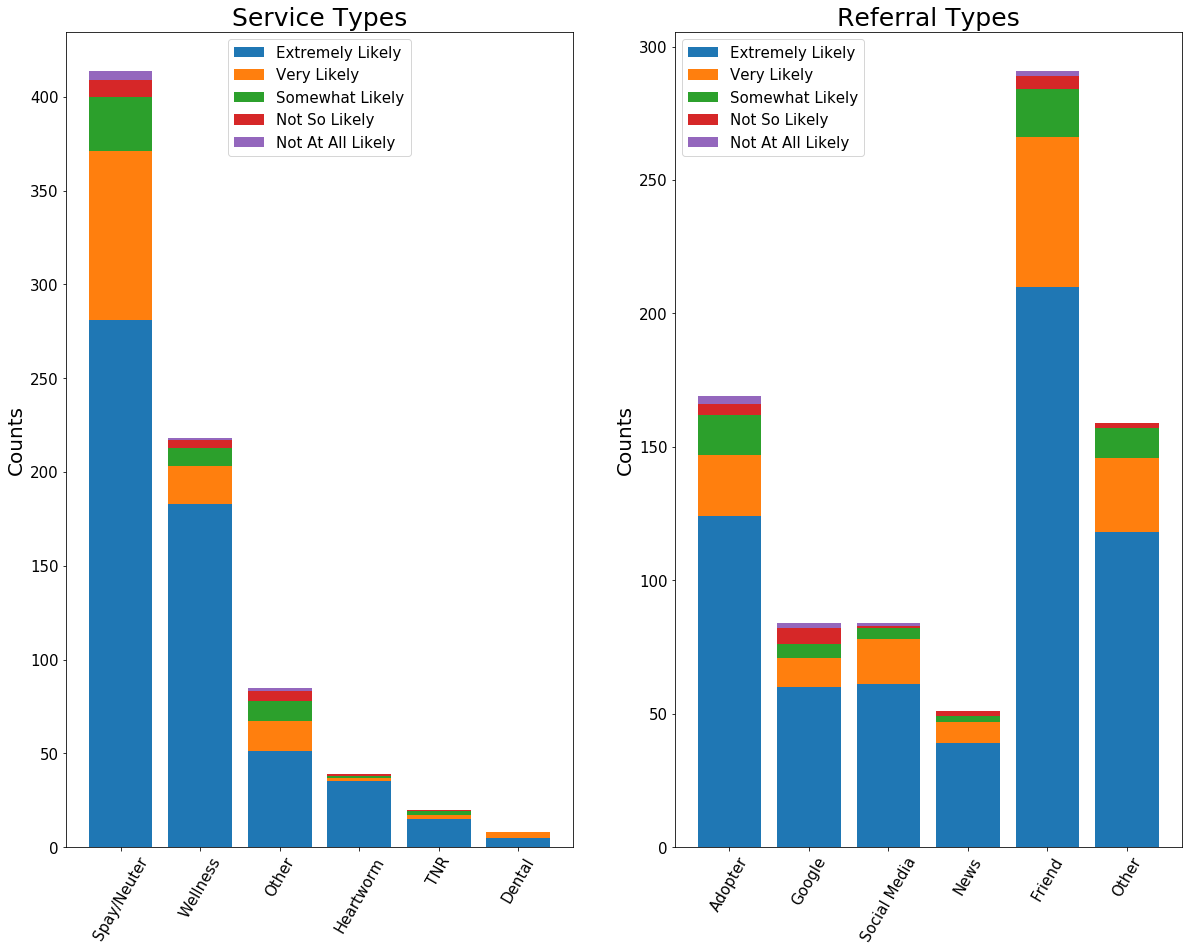

In [10]:
#Step 8: Stacked Bar charges to compare will return with features
plt.rcParams['figure.figsize'] = (20, 15)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2)

#service
Service_Extreme  = df[df['ExtremeLikely']==1]['Service'].value_counts()

Service_Very = df[df['VeryLikely']==1]['Service'].value_counts()
Service_Very = Service_Very.reindex(index = Service_Extreme.index)

Service_Somewhat = df[df['SomewhatLikely']==1]['Service'].value_counts()
Service_Somewhat = Service_Somewhat.reindex(index = Service_Extreme.index)

Service_NotSo = df[df['NotSoLikely']==1]['Service'].value_counts()
Service_NotSo = Service_NotSo.reindex(index = Service_Extreme.index)

Service_NotAtAll = df[df['NotAtAllLikely']==1]['Service'].value_counts()
Service_NotAtAll = Service_NotAtAll.reindex(index = Service_Extreme.index)

# Service_Return.index, Service_Return.values
# make the bar plot
p1 = axes[0].bar(Service_Extreme.index, Service_Extreme.values)
p2 = axes[0].bar(Service_Very.index, Service_Very.values, bottom=Service_Extreme.values)
p3 = axes[0].bar(Service_Somewhat.index, Service_Somewhat.values, bottom=Service_Extreme.values + Service_Very.values)
p4 = axes[0].bar(Service_NotSo.index, Service_NotSo.values, bottom=Service_Extreme.values + Service_Very.values 
                 + Service_Somewhat.values)
p5 = axes[0].bar(Service_NotAtAll.index, Service_NotAtAll.values, bottom=Service_Extreme.values + Service_Very.values 
                 + Service_Somewhat.values + Service_NotSo.values)
axes[0].set_title('Service Types', fontsize=25)
axes[0].set_ylabel('Counts', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Extremely Likely', 'Very Likely', 'Somewhat Likely', 'Not So Likely', 'Not At All Likely'), fontsize = 15)
axes[0].tick_params(axis='x', labelrotation=60)



#referral


referral_names = {'Ref_Friend':'Friend', 'Ref_Adopter': 'Adopter', 'Ref_Google':'Google', 'Ref_News': 'News', 
                 'Ref_Social':'Social Media', 'Ref_Other':'Other'}
referral = df.rename(columns=referral_names)

Referral_Extreme = referral[referral['ExtremeLikely']==1].iloc[:, 5:11].sum()

Referral_Very = referral[referral['VeryLikely']==1].iloc[:, 5:11].sum()
Referral_Very = Referral_Very.reindex(index = Referral_Extreme.index)

Referral_Somewhat = referral[referral['SomewhatLikely']==1].iloc[:, 5:11].sum()
Referral_Somewhat = Referral_Somewhat.reindex(index = Referral_Extreme.index)

Referral_NotSo = referral[referral['NotSoLikely']==1].iloc[:, 5:11].sum()
Referral_NotSo = Referral_NotSo.reindex(index = Referral_Extreme.index)

Referral_NotAtAll = referral[referral['NotAtAllLikely']==1].iloc[:, 5:11].sum()
Referral_NotAtAll = Referral_NotAtAll.reindex(index = Referral_Extreme.index)

# Service_Return.index, Service_Return.values
# make the bar plot
p6 = axes[1].bar(Referral_Extreme.index, Referral_Extreme.values)
p7 = axes[1].bar(Referral_Very.index, Referral_Very.values, bottom=Referral_Extreme.values)
p8 = axes[1].bar(Referral_Somewhat.index, Referral_Somewhat.values, bottom=Referral_Extreme.values + Referral_Very)
p9 = axes[1].bar(Referral_NotSo.index, Referral_NotSo.values, bottom=Referral_Extreme.values + Referral_Very + Referral_Somewhat)
p10 = axes[1].bar(Referral_NotAtAll.index, Referral_NotAtAll.values, bottom=Referral_Extreme.values + Referral_Very 
                 + Referral_Somewhat + Referral_NotSo)
axes[1].set_title('Referral Types', fontsize=25)
axes[1].set_ylabel('Counts', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].legend((p6[0], p7[0], p8[0], p9[0], p10[0]), ('Extremely Likely', 'Very Likely', 'Somewhat Likely', 'Not So Likely', 'Not At All Likely'), fontsize = 15)
axes[1].tick_params(axis='x', labelrotation=60)


#### Additional Observations:
- It appears that most people who will not return are located in the Spay/Neuter service type group; however, that group also had the most visits period so we would need to look at the percentage of those who returned in each group to compare.
- The referal type that had the most people who stated they would not return was Google.  This had one of the fewest people which could be meaningful.  Perhaps the google search criteria needs to be tweaked as people are not getting what they were expecting.

In [11]:
#Step 9: Drop Unneeded Columns

# the collector ID should be the same for all values since the survey was only from one organization
# Start Date/End Date for when the survey were completed are not necessary for this analysis
# Custom Data 1 does not seem to contain any relevant data

#drop unneeded columns
df = df.drop(columns=['Collector ID', 'Start Date', 'End Date', 'Custom Data 1'])
df.head(5)

,Respondent ID,Ref_Adopter,Ref_Google,Ref_Social,Ref_News,Ref_Friend,Ref_Other,Service,Service_Other,ExtremeLikely,VeryLikely,SomewhatLikely,NotSoLikely,NotAtAllLikely,Feedback,Other_Notes
1,1.148614e+10,1,0,0,0,0,0,Other,Illness care,1,0,0,0,0,Pretty good protocol during COVID-19.,NaN
2,1.148543e+10,0,0,0,0,1,1,Wellness,NaN,1,0,0,0,0,N/A,Donald Lofton
3,1.147681e+10,0,0,0,0,0,1,Other,First time puppy visit,1,0,0,0,0,It was a great experience!,New Orleans native. SPCA has been around since...
4,1.147654e+10,0,0,0,0,1,0,Spay/Neuter,NaN,0,0,1,0,0,"I took my small dog to get spayed, and althoug...",NaN
5,1.147411e+10,0,0,0,0,1,0,Wellness,NaN,1,0,0,0,0,Due to the covid 19 I am really in a bind for ...,NaN


In [12]:
# Step 10: Create create another column that groups these return ratings together

# Extremely likely to return, and very likely to return will be considered Yes
# Somewhat likely to return will be considered Neutral.  A decision needs to be made on whether to group these into the yes or 
# no category.  I'm currently taking the approach to just remove them from the analysis until I can hear back from the 
# SPCA Communications Director.
# Not So Likely and not at all likely will be No

#This will be the target variable


df['WillReturn'] = ['neutral' if x[2] == 1
                             else 'yes' if (x[0] == 1 or x[1] == 1) else 'no'
                             for x in df.iloc[:, 9:14].values]

# Creating a numerical representation of the target variable.  -1 will represent neutral for now and will be filtered out before any machine learning
df['target'] =  [-1 if x == 'neutral'
                              else 1 if (x == 'yes') else 0
                              for x in df['WillReturn'].values]


#validate result
df.head()

,Respondent ID,Ref_Adopter,Ref_Google,Ref_Social,Ref_News,Ref_Friend,Ref_Other,Service,Service_Other,ExtremeLikely,VeryLikely,SomewhatLikely,NotSoLikely,NotAtAllLikely,Feedback,Other_Notes,WillReturn,target
1,1.148614e+10,1,0,0,0,0,0,Other,Illness care,1,0,0,0,0,Pretty good protocol during COVID-19.,NaN,yes,1
2,1.148543e+10,0,0,0,0,1,1,Wellness,NaN,1,0,0,0,0,N/A,Donald Lofton,yes,1
3,1.147681e+10,0,0,0,0,0,1,Other,First time puppy visit,1,0,0,0,0,It was a great experience!,New Orleans native. SPCA has been around since...,yes,1
4,1.147654e+10,0,0,0,0,1,0,Spay/Neuter,NaN,0,0,1,0,0,"I took my small dog to get spayed, and althoug...",NaN,neutral,-1
5,1.147411e+10,0,0,0,0,1,0,Wellness,NaN,1,0,0,0,0,Due to the covid 19 I am really in a bind for ...,NaN,yes,1


In [13]:
# Step 11: Convert the Service Categories to numerical features

#get the categorical data

services = df['Service']

# One Hot Encoding 
service_dummies = pd.get_dummies(services)

# check the data
service_dummies.head(8)

,Dental,Heartworm,Other,Spay/Neuter,TNR,Wellness
1,0,0,1,0,0,0
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,0,0,0,1,0,0
5,0,0,0,0,0,1
6,0,0,0,0,0,1
7,0,0,1,0,0,0
8,0,0,0,0,0,1


In [14]:
#merge the one hot encoded variables the dataframe

df = df.merge(service_dummies, left_index=True, right_index=True)

df.head(5)

,Respondent ID,Ref_Adopter,Ref_Google,Ref_Social,Ref_News,Ref_Friend,Ref_Other,Service,Service_Other,ExtremeLikely,...,Feedback,Other_Notes,WillReturn,target,Dental,Heartworm,Other,Spay/Neuter,TNR,Wellness
1,1.148614e+10,1,0,0,0,0,0,Other,Illness care,1,...,Pretty good protocol during COVID-19.,NaN,yes,1,0,0,1,0,0,0
2,1.148543e+10,0,0,0,0,1,1,Wellness,NaN,1,...,N/A,Donald Lofton,yes,1,0,0,0,0,0,1
3,1.147681e+10,0,0,0,0,0,1,Other,First time puppy visit,1,...,It was a great experience!,New Orleans native. SPCA has been around since...,yes,1,0,0,1,0,0,0
4,1.147654e+10,0,0,0,0,1,0,Spay/Neuter,NaN,0,...,"I took my small dog to get spayed, and althoug...",NaN,neutral,-1,0,0,0,1,0,0
5,1.147411e+10,0,0,0,0,1,0,Wellness,NaN,1,...,Due to the covid 19 I am really in a bind for ...,NaN,yes,1,0,0,0,0,0,1


In [15]:
# Step 12: view all of the entries into service other to veiw if any category values in service should be different

print(df.Service_Other.notnull().sum())
print(df[df.Service_Other.notnull()]['Service_Other'])
print(df.Service_Other.unique())

#I can see some values in here that contain keywords that would fit into a category but If i attempt context analysis, some
# may get miscoded.  Such as "Spay, cancelled"  I wouldn't want to count that as a spay/neuter because the service was not 
#necessarily completed.  Another example is when the person had multiple types of services in the same appointment.  I don't 
#want to make any additional assumptions that could change the data so for this example I will trust the user's response

84
1                                           Illness care
3                                 First time puppy visit
7      Had bite wound bandaged up, then had stitches ...
22                                        Skin allergies
57                                       Spay, cancelled
                             ...                        
692                                     Booster vaccines
707                    Wellness, Vaccinations and Dental
748                                               Dental
752    Evaluation of my injured tortoise and treatmen...
755                              Ear hematoma treatment 
Name: Service_Other, Length: 84, dtype: object
['Illness care' nan 'First time puppy visit'
 'Had bite wound bandaged up, then had stitches taken out'
 'Skin allergies' 'Spay, cancelled' 'Microchip' 'adoption booster'
 'Puppy package' 'Vaccinations '
 "Critical treatment for my pet's heartworm issue" 'boosters' 'Lepto shot'
 'Follow up shots after adoption' 'Flu shot'

In [16]:
df[df['target'] != -1]

,Respondent ID,Ref_Adopter,Ref_Google,Ref_Social,Ref_News,Ref_Friend,Ref_Other,Service,Service_Other,ExtremeLikely,...,Feedback,Other_Notes,WillReturn,target,Dental,Heartworm,Other,Spay/Neuter,TNR,Wellness
1,1.148614e+10,1,0,0,0,0,0,Other,Illness care,1,...,Pretty good protocol during COVID-19.,NaN,yes,1,0,0,1,0,0,0
2,1.148543e+10,0,0,0,0,1,1,Wellness,NaN,1,...,N/A,Donald Lofton,yes,1,0,0,0,0,0,1
3,1.147681e+10,0,0,0,0,0,1,Other,First time puppy visit,1,...,It was a great experience!,New Orleans native. SPCA has been around since...,yes,1,0,0,1,0,0,0
5,1.147411e+10,0,0,0,0,1,0,Wellness,NaN,1,...,Due to the covid 19 I am really in a bind for ...,NaN,yes,1,0,0,0,0,0,1
6,1.147173e+10,1,0,0,0,0,0,Wellness,NaN,1,...,Thanks so much to all the outstanding staff wh...,NaN,yes,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,1.007084e+10,1,0,0,0,0,0,Wellness,NaN,1,...,I wish they would have been more thorough on t...,NaN,yes,1,0,0,0,0,0,1
775,1.007035e+10,0,0,0,0,0,1,Wellness,NaN,0,...,NaN,Local vet,yes,1,0,0,0,0,0,1
776,1.006989e+10,0,0,1,0,0,0,Wellness,NaN,1,...,Thank you to the wonderful staff,NaN,yes,1,0,0,0,0,0,1
777,1.006939e+10,0,0,0,0,1,0,Wellness,NaN,0,...,My appointment time was for 2:20. I arrived at...,NaN,no,0,0,0,0,0,0,1


In [17]:
#Step 13 - create a whole features dataset that can be used for train and validation data splitting

# Create a dataset that contains only the dummy features we want to feed throught he model
features_model = ['Ref_Adopter', 'Ref_Google', 'Ref_Social', 'Ref_Friend','Ref_News', 'Ref_Other', 'Dental', 
                  'Heartworm', 'Other', 'Spay/Neuter', 'TNR', 'Wellness']
data_model_X = df[df['target'] != -1][features_model]
data_model_X


,Ref_Adopter,Ref_Google,Ref_Social,Ref_Friend,Ref_News,Ref_Other,Dental,Heartworm,Other,Spay/Neuter,TNR,Wellness
1,1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,1,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,1
6,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
774,1,0,0,0,0,0,0,0,0,0,0,1
775,0,0,0,0,0,1,0,0,0,0,0,1
776,0,0,1,0,0,0,0,0,0,0,0,1
777,0,0,0,1,0,0,0,0,0,0,0,1


In [18]:
# create a whole target dataset that can be used for train and validation data splitting
data_model_y = df[df['target'] != -1]['target']
data_model_y

1      1
2      1
3      1
5      1
6      1
      ..
774    1
775    1
776    1
777    0
778    1
Name: target, Length: 725, dtype: int64

In [19]:
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, y_train, y_test = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_test.shape[0])

# Survived and not-survived
print('\n')
print('No. of survived and not-survived in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of survived and not-survived in the validation set:')
print(y_test.value_counts())

No. of samples in training set:  507
No. of samples in validation set: 218


No. of survived and not-survived in the training set:
1    490
0     17
Name: target, dtype: int64


No. of survived and not-survived in the validation set:
1    207
0     11
Name: target, dtype: int64


C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


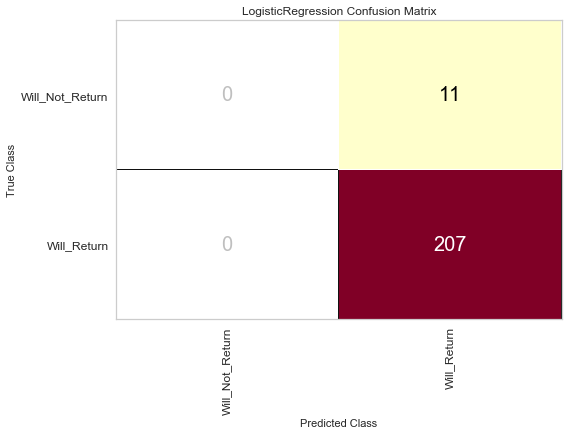

In [20]:
# Step 14 - Eval Metrics
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression(random_state=0)

#The ConfusionMatrix visualizer taxes a model
classes = ['Will_Not_Return','Will_Return']
cm = ConfusionMatrix(model, classes=classes, label_encoder={0: 'Will Not Return', 1: 'Will Return'}, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

In [21]:
cm.score_

0.9495412844036697

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


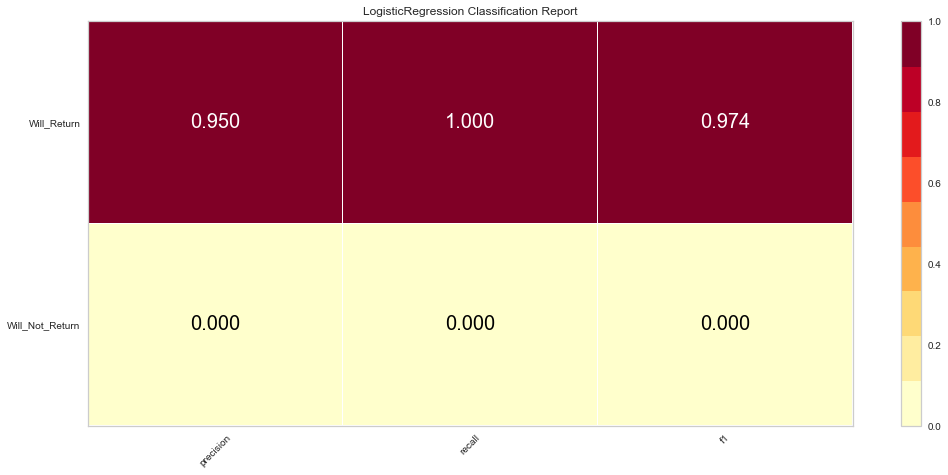

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


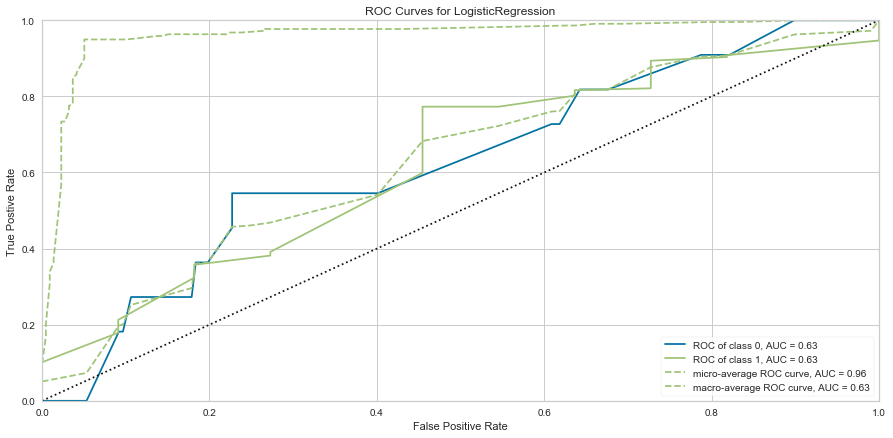

In [22]:
## Even though the score is high, the model's performance is not good because
# it is predicting that everyone will return.  

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

In [23]:
#The classification report shows that the model is effective in predicting who will return based on all scores 
#but is not accurate at all when predicting when someone will not return. 

#The ROC curve shows that the micro-average ROC curve is highly accurate.  

In [24]:
#running again but using class_weight = balanced for Logistic Regression

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


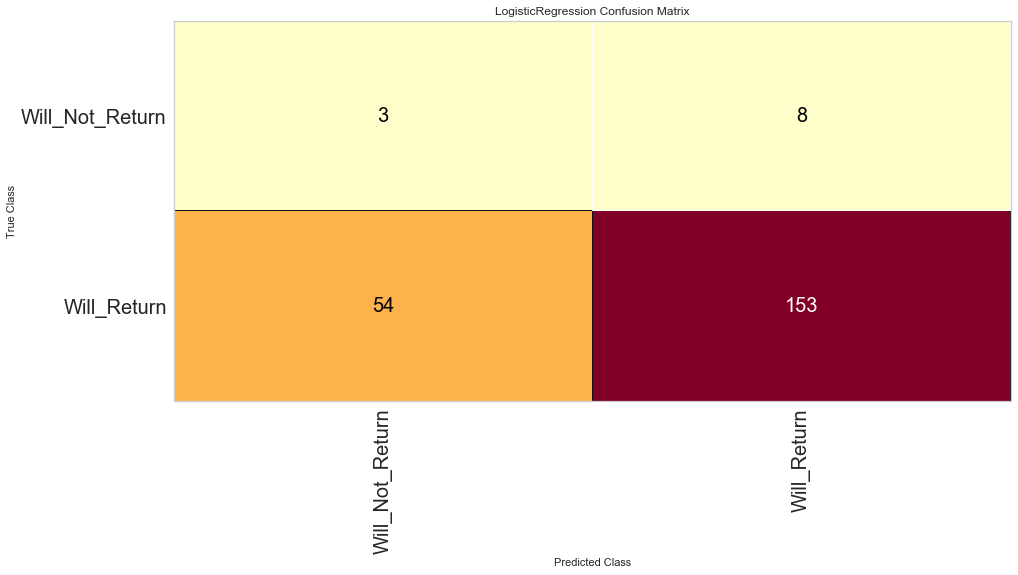

In [25]:
# Instantiate the classification model 
model2 = LogisticRegression(class_weight="balanced", random_state=0)

#The ConfusionMatrix visualizer taxes a model
classes = ['Will_Not_Return','Will_Return']
cm2 = ConfusionMatrix(model2, classes=classes, label_encoder={0: 'Will Not Return', 1: 'Will Return'}, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm2.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm2.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm2.ax.texts:
    label.set_size(20)

#How did we do?
cm2.poof()

In [26]:
cm2.score_

0.7155963302752294

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


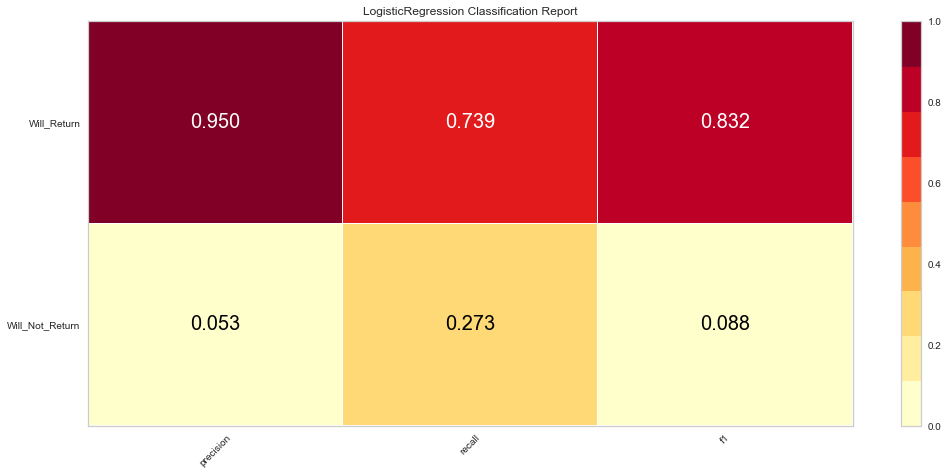

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


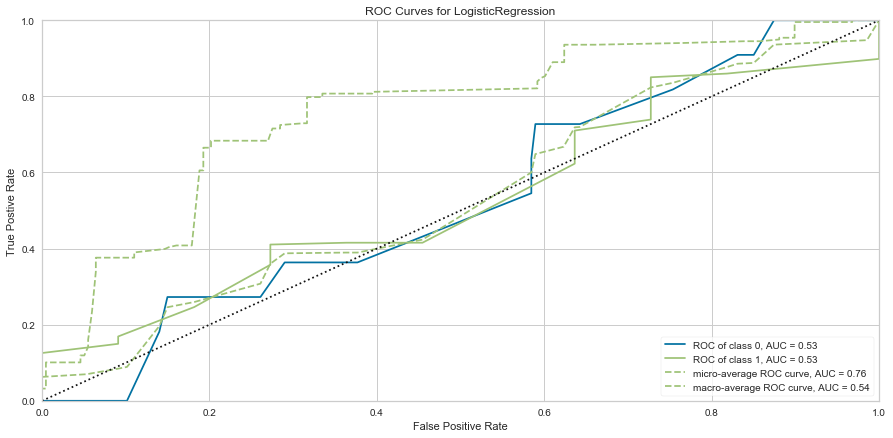

In [27]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model2, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model2)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

In [28]:
# The precision of the model's ability to predict that someone will return stayed the same while the scores improved overall
# for the model's ability to predict who will not return.  However, the metrics did not approve enough for those who will
# not return to be considered an accurate predictor.  

#all of the metrics on the ROC curve indicate the overall predictabiliyt of th emodel decreased.

#i'm going to try another algorithm

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


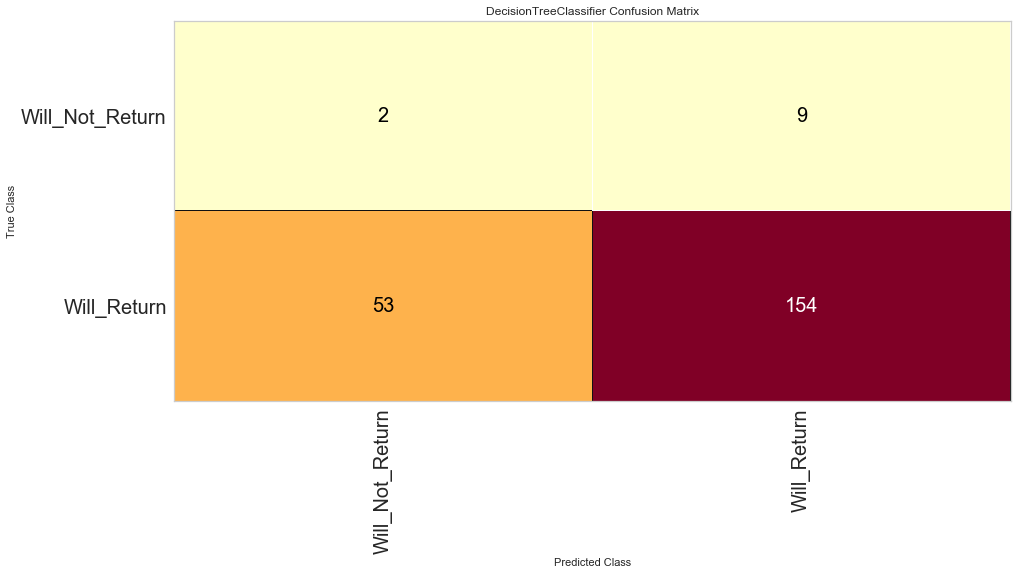

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classification model 
model3 = DecisionTreeClassifier(class_weight="balanced", random_state=0)

#The ConfusionMatrix visualizer taxes a model
classes = ['Will_Not_Return','Will_Return']
cm3 = ConfusionMatrix(model3, classes=classes, label_encoder={0: 'Will Not Return', 1: 'Will Return'}, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm3.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm3.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm3.ax.texts:
    label.set_size(20)

#How did we do?
cm3.poof()

In [30]:
cm3.score_

0.7155963302752294

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


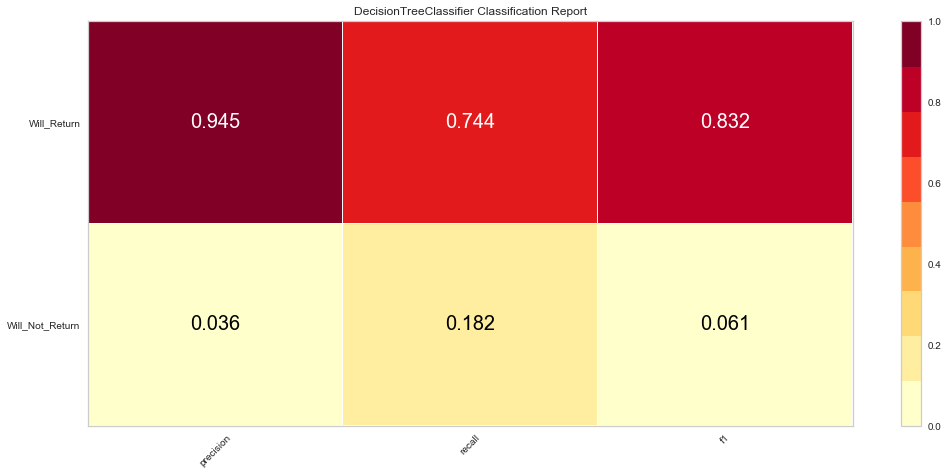

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


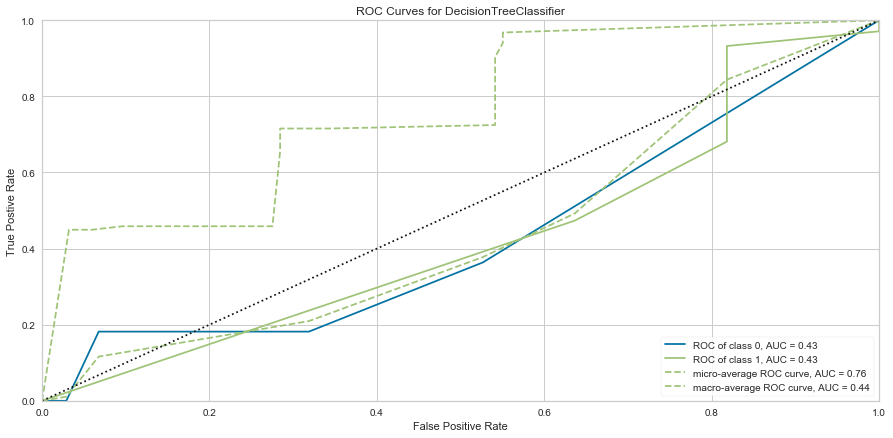

In [31]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model3, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model3)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


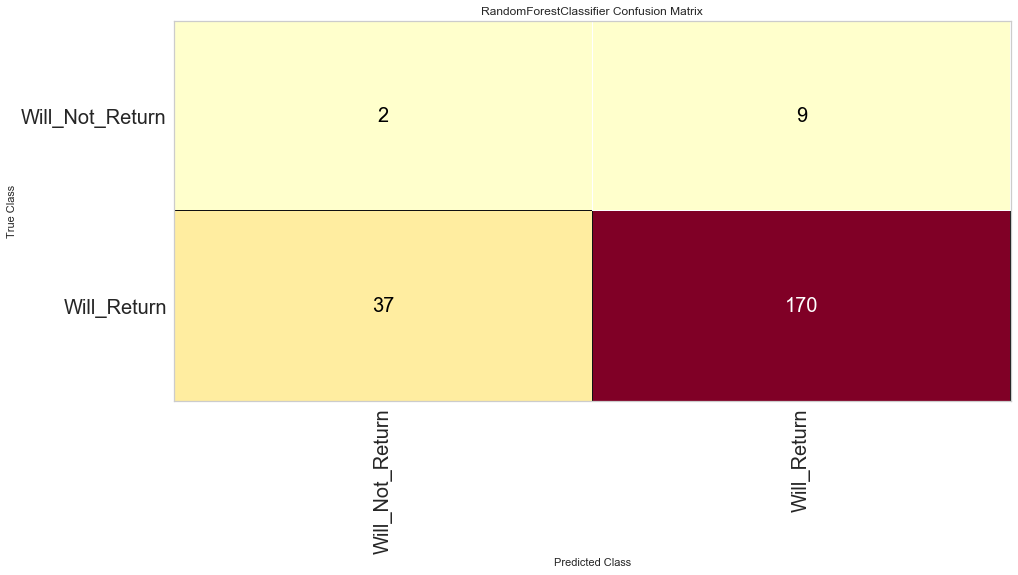

In [32]:
#attempting random forest

from sklearn.ensemble import RandomForestClassifier

# Instantiate the classification model 
model4 = RandomForestClassifier(class_weight="balanced", random_state=0)

#The ConfusionMatrix visualizer taxes a model
classes = ['Will_Not_Return','Will_Return']
cm4 = ConfusionMatrix(model4, classes=classes, label_encoder={0: 'Will Not Return', 1: 'Will Return'}, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm4.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm4.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm4.ax.texts:
    label.set_size(20)

#How did we do?
cm4.poof()

In [33]:
cm4.score_

0.7889908256880734

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


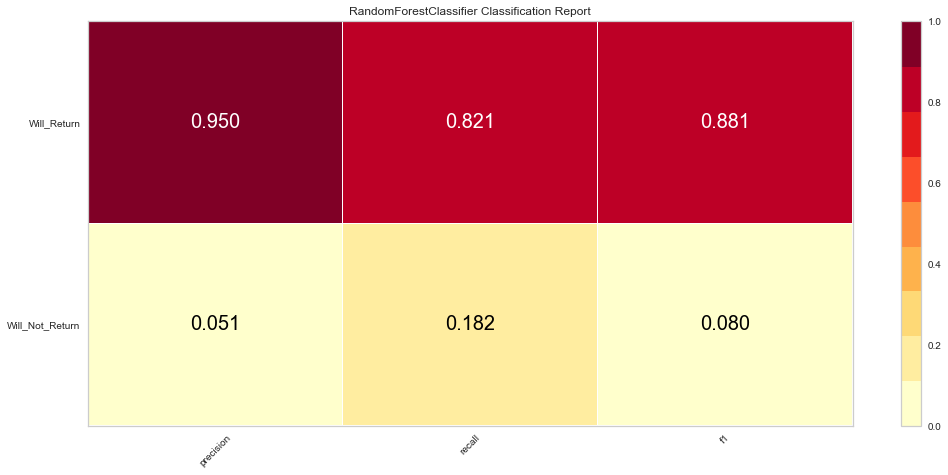

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


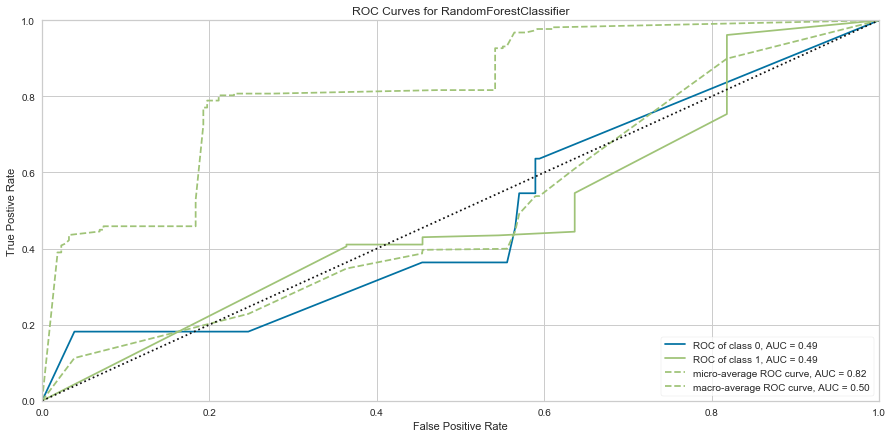

In [34]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model4, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model4)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\rvick\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


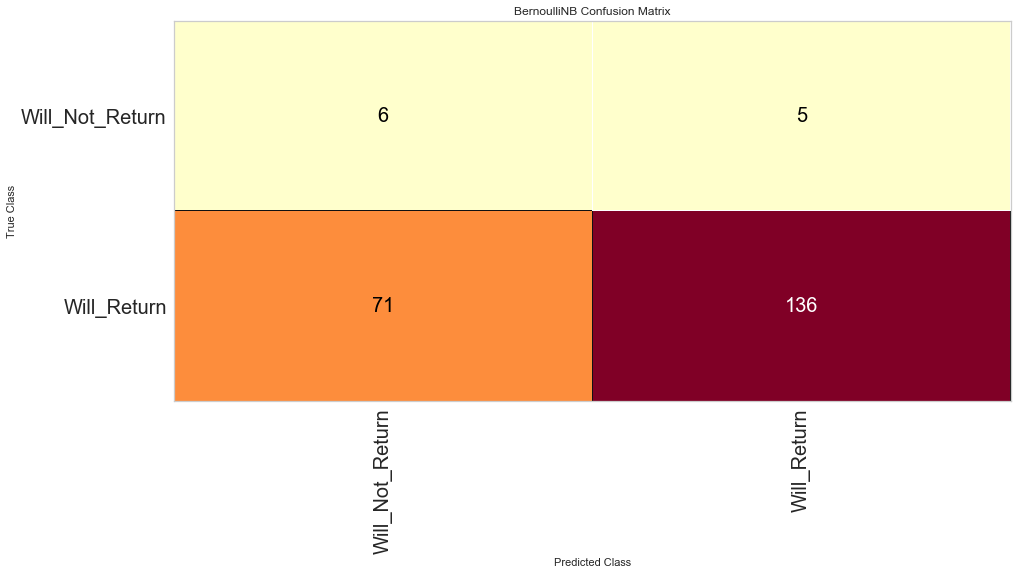

In [35]:
 
#trying naive bayes
from sklearn.naive_bayes import BernoulliNB

classifier = BernoulliNB(fit_prior=False)
model6 = classifier.fit(X_train, y_train)

classes = ['Will_Not_Return','Will_Return']
cm6 = ConfusionMatrix(model6, classes=classes, label_encoder={0: 'Will Not Return', 1: 'Will Return'}, percent=False, is_fitted=True)


cm6.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm6.ax.texts:
    label.set_size(20)

#How did we do?
cm6.poof()

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


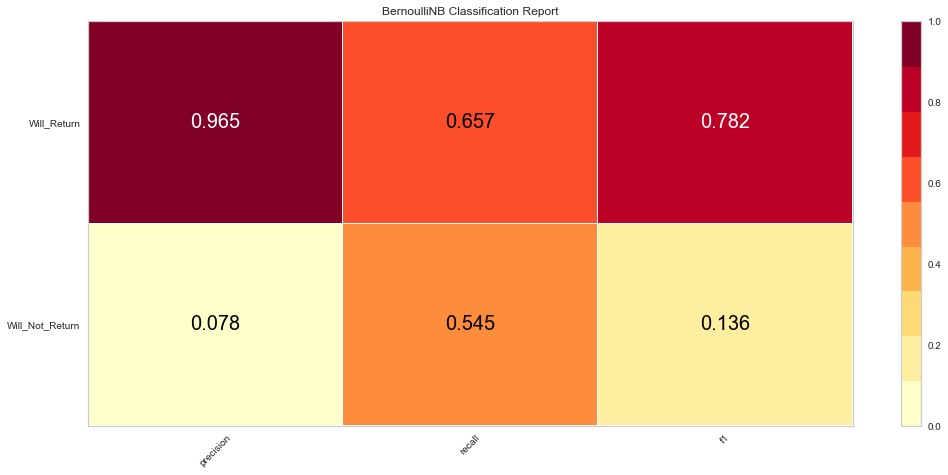

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


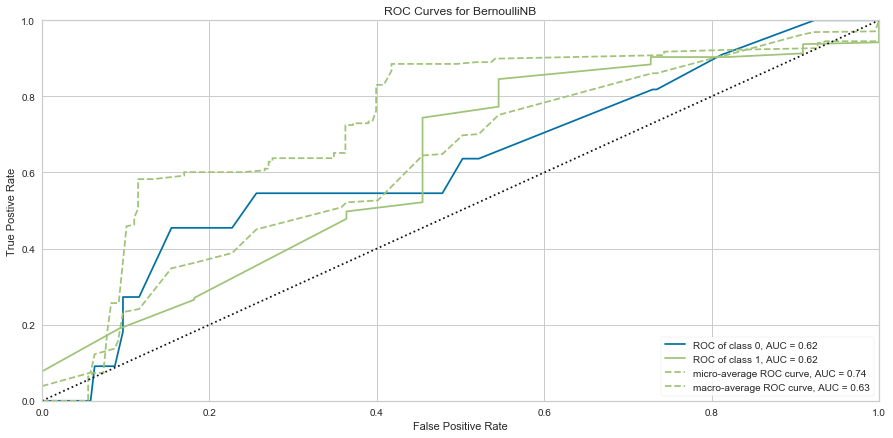

In [36]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model6, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model6)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

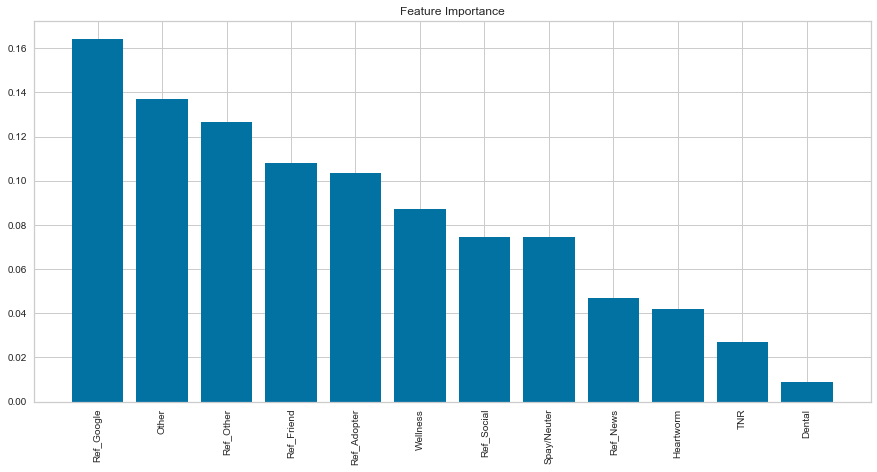

In [37]:
#Step 15: Re-evaluate features selected for the model
#using random forest improves the effectiveness of the model from decision tree. 
# Its predicability decreased for predicting when someone will not return
#I'm curious as to if I have too many features.  I'm going to plot the important features to see 
#if we can reduce any in the model.

randomforest = RandomForestClassifier(class_weight="balanced")

model = randomforest.fit(data_model_X, data_model_y)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [data_model_X.columns[i] for i in indices]

plt.figure()

plt.title("Feature Importance")
plt.bar(range(data_model_X.shape[1]), importances[indices])
plt.xticks(range(data_model_X.shape[1]), names, rotation=90)
plt.show()



C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\rvick\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


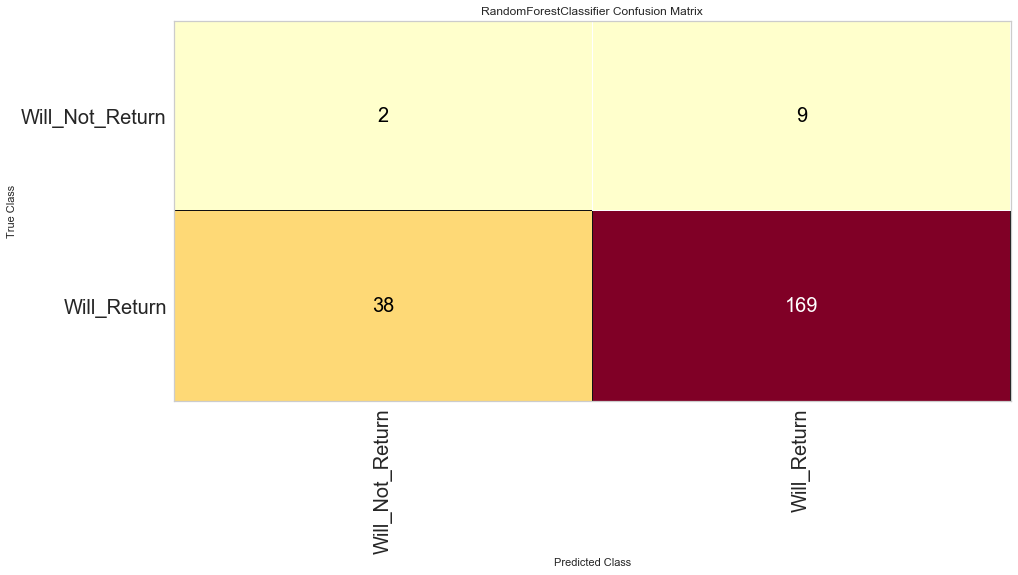

In [38]:
#Run with a threshold of .08 since their is a more significant break between the features.
from sklearn.feature_selection import SelectFromModel

randomforest = RandomForestClassifier(n_jobs=-1, class_weight="balanced", random_state=0)

#select only the features with the highest importance
selector = SelectFromModel(randomforest, threshold=.06)

important_X_train = selector.fit_transform(X_train, y_train)

model5 = randomforest.fit(important_X_train, y_train)

classes = ['Will_Not_Return','Will_Return']
cm5 = ConfusionMatrix(model5, classes=classes, label_encoder={0: 'Will Not Return', 1: 'Will Return'}, percent=False, is_fitted=True)

important_X_test = selector.transform(X_test)

cm5.score(important_X_test, y_test)

# change fontsize of the labels in the figure
for label in cm5.ax.texts:
    label.set_size(20)

#How did we do?
cm5.poof()

In [39]:
cm5.score_

0.7844036697247706

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


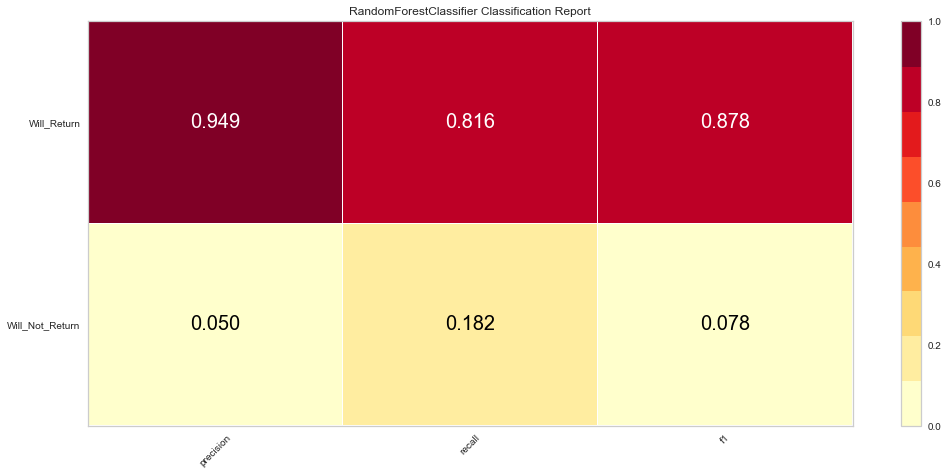

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


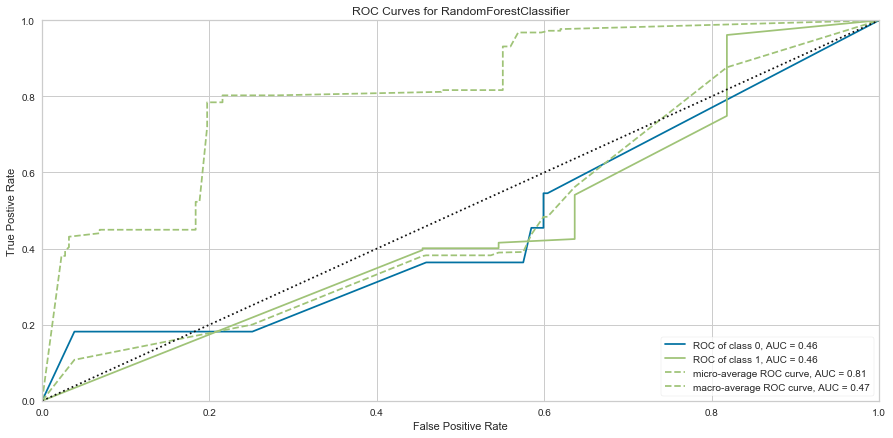

In [40]:
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model5, classes=classes)

visualizer.fit(important_X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(important_X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model5)

visualizer.fit(important_X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(important_X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()


In [41]:
#checking for variance threshold of the features
from sklearn.feature_selection import VarianceThreshold

thresholder = VarianceThreshold(threshold=(.75 * (1 - .75)))
X = thresholder.fit_transform(data_model_X)

data_model_X.columns[thresholder.get_support(indices=True)]

#Would the model be better if it only used these features?


Index(['Ref_Friend', 'Spay/Neuter', 'Wellness'], dtype='object')

In [42]:
# Create a dataset that contains only the dummy features we want to feed throught he model
features_model = ['Ref_Friend','Spay/Neuter', 'Wellness']
var_data_model_X = df[df['target'] != -1][features_model]
var_data_model_X

,Ref_Friend,Spay/Neuter,Wellness
1,0,0,0
2,1,0,1
3,0,0,0
5,1,0,1
6,0,0,1
...,...,...,...
774,0,0,1
775,0,0,1
776,0,0,1
777,1,0,1


In [43]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(var_data_model_X, data_model_y, test_size =0.3, random_state=11)

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


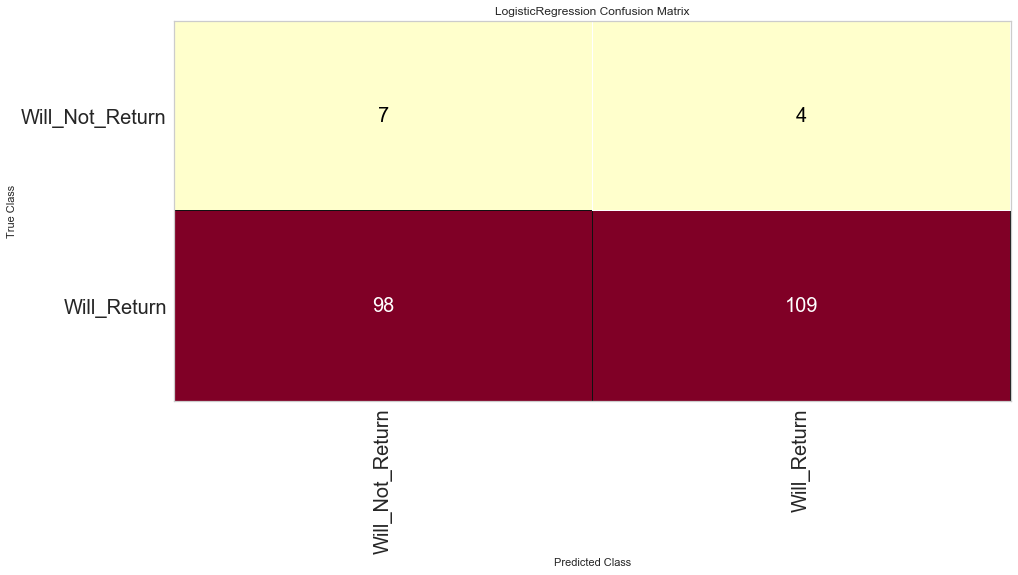

In [44]:
# Instantiate the classification model 
model = LogisticRegression(random_state=0, class_weight="balanced")

#The ConfusionMatrix visualizer taxes a model
classes = ['Will_Not_Return','Will_Return']
cm = ConfusionMatrix(model, classes=classes, label_encoder={0: 'Will Not Return', 1: 'Will Return'}, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

In [45]:
cm.score_


0.5321100917431193

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


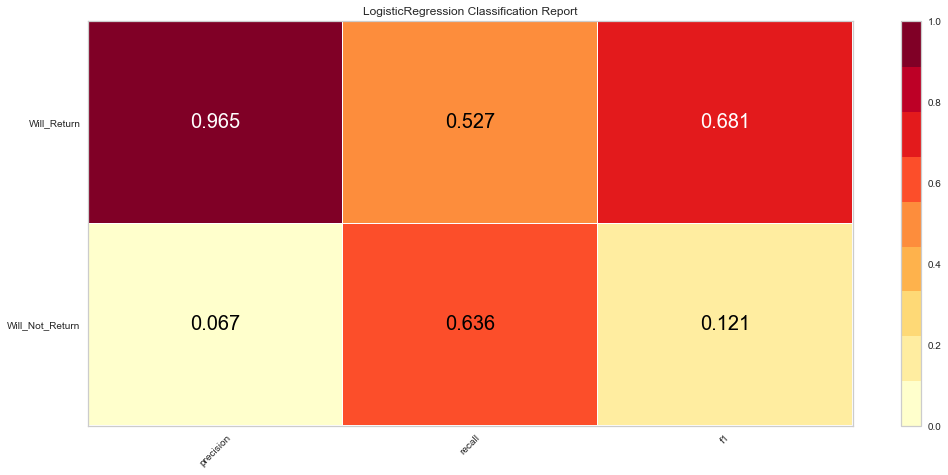

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


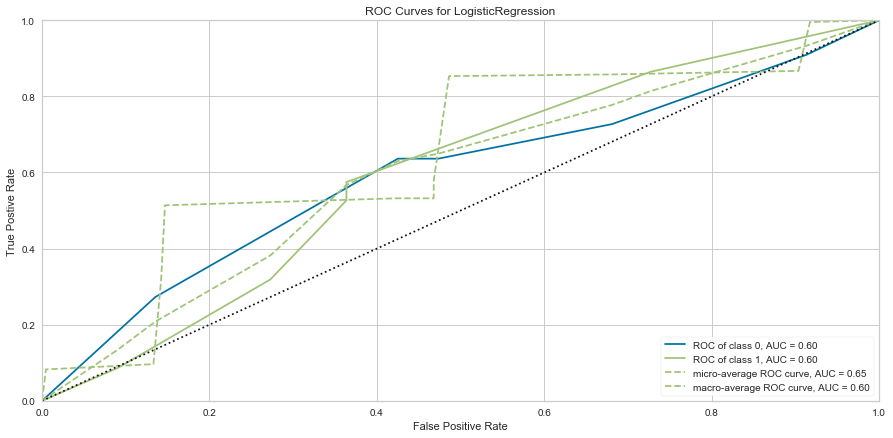

In [46]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

In [47]:
#this model produces the best result for those who will not return
from sklearn.feature_selection import RFECV

# Create a dataset that contains only the dummy features we want to feed throught he model
features_model = ['Ref_Adopter', 'Ref_Google', 'Ref_Social', 'Ref_Friend','Ref_News', 'Ref_Other', 'Dental', 
                  'Heartworm', 'Other', 'Spay/Neuter', 'TNR', 'Wellness']
data_model_X = df[df['target'] != -1][features_model]

#try recursive feature selection and re-running the model
# Instantiate the classification model 
model = LogisticRegression(random_state=0, class_weight="balanced")

rfecv = RFECV(estimator=model, step=1, scoring="f1")
rfecv.fit(data_model_X, data_model_y)
rfecv.transform(data_model_X)

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       ...,
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=object)

In [48]:
rfecv.support_

array([False, False,  True, False, False,  True, False, False,  True,
       False, False, False])

In [49]:
data_model_X.columns[rfecv.support_]

Index(['Ref_Social', 'Ref_Other', 'Other'], dtype='object')

In [50]:
rfecv.ranking_

array([ 4,  9,  1,  2,  3,  1,  5,  6,  1,  8, 10,  7])

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


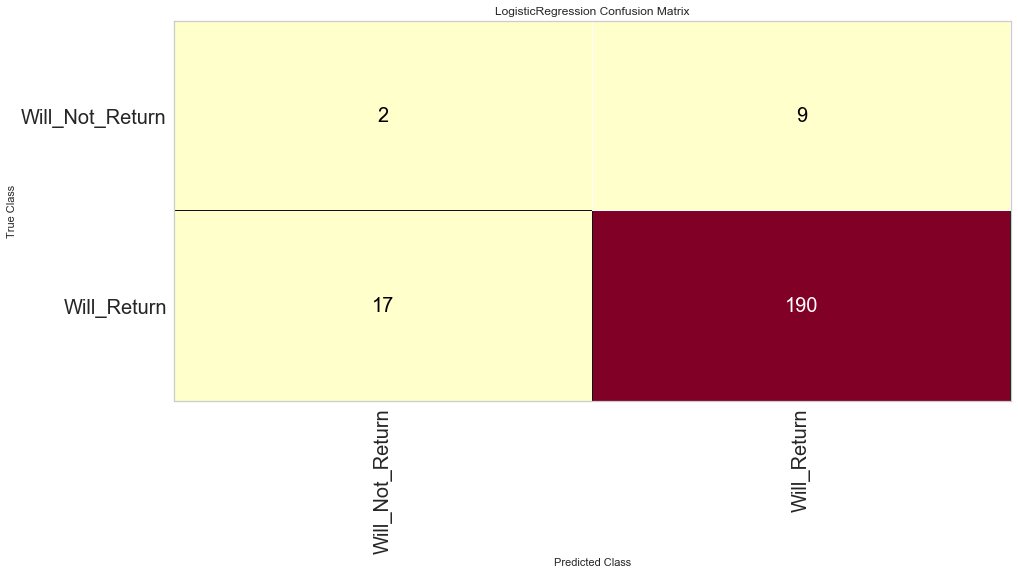

In [51]:
#split the data again and retrain the model with only these features
features_model = ['Ref_Social', 'Ref_Other', 'Other']
rfecv_X = df[df['target'] != -1][features_model]

# split the data
X_train, X_test, y_train, y_test = train_test_split(rfecv_X, data_model_y, test_size =0.3, random_state=11)

# Instantiate the classification model 
model = LogisticRegression(random_state=0, class_weight="balanced")

#The ConfusionMatrix visualizer taxes a model
classes = ['Will_Not_Return','Will_Return']
cm = ConfusionMatrix(model, classes=classes, label_encoder={0: 'Will Not Return', 1: 'Will Return'}, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


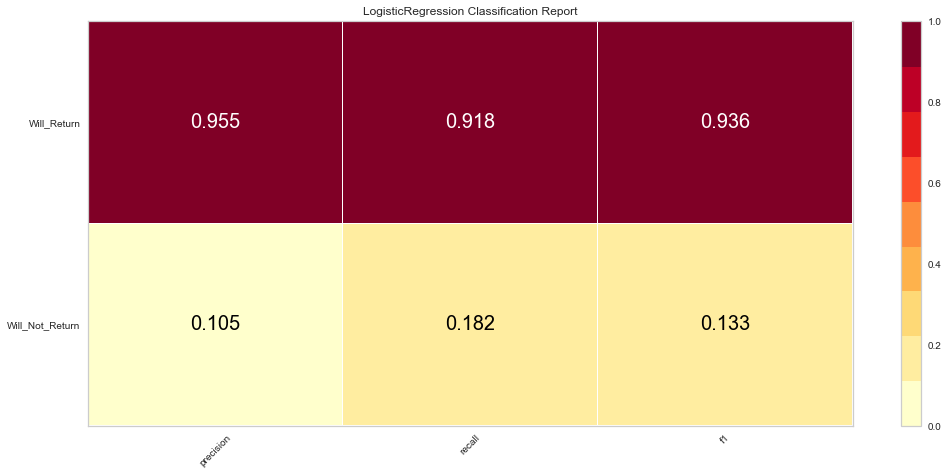

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


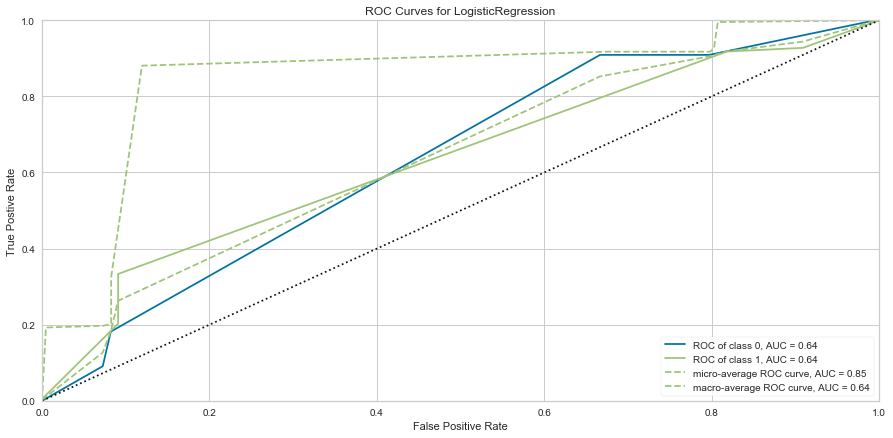

In [52]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

In [53]:
#try recursive feature elimination with the RandomForestClassifier
# Create a dataset that contains only the dummy features we want to feed throught he model
features_model = ['Ref_Adopter', 'Ref_Google', 'Ref_Social', 'Ref_Friend','Ref_News', 'Ref_Other', 'Dental', 
                  'Heartworm', 'Other', 'Spay/Neuter', 'TNR', 'Wellness']
data_model_X = df[df['target'] != -1][features_model]

#try recursive feature selection and re-running the model
# Instantiate the classification model 
model = RandomForestClassifier(random_state=0, class_weight="balanced")

rfecv = RFECV(estimator=model, step=1, scoring="f1")
rfecv.fit(data_model_X, data_model_y)
rfecv.transform(data_model_X)

array([[1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]], dtype=object)

In [54]:
data_model_X.columns[rfecv.support_]

Index(['Ref_Adopter', 'Ref_Google', 'Ref_Social', 'Ref_Friend', 'Ref_Other',
       'Other', 'Spay/Neuter', 'Wellness'],
      dtype='object')

In [55]:
rfecv.ranking_

array([1, 1, 1, 1, 2, 1, 5, 3, 1, 1, 4, 1])

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


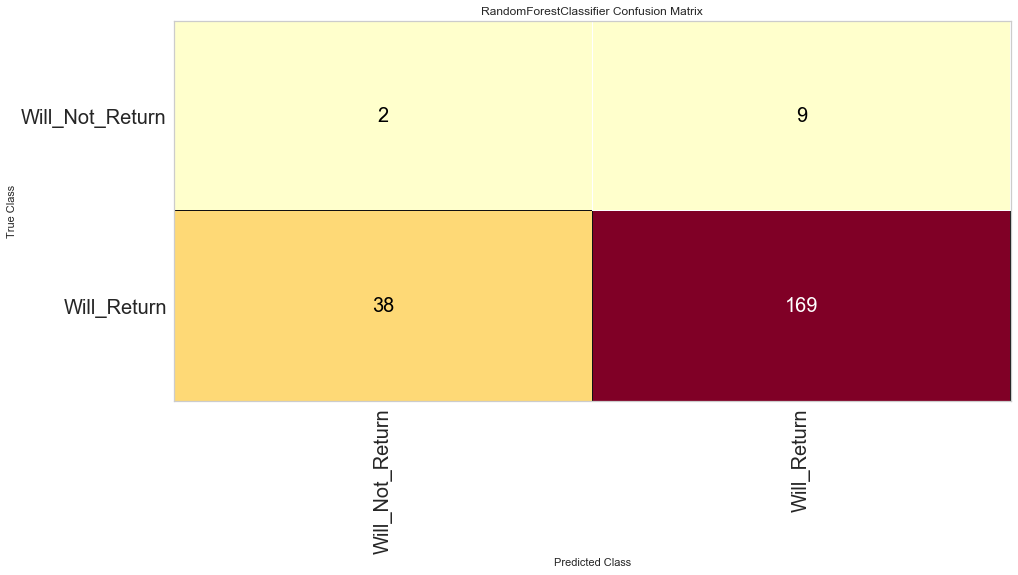

In [56]:
#reset the features dataset
features_model = ['Ref_Adopter', 'Ref_Google', 'Ref_Social', 'Ref_Friend', 'Ref_Other', 'Other', 'Spay/Neuter', 'Wellness']
rfecv_X = df[df['target'] != -1][features_model]

# split the data
X_train, X_test, y_train, y_test = train_test_split(rfecv_X, data_model_y, test_size =0.3, random_state=11)

# Instantiate the classification model 
model = RandomForestClassifier(class_weight="balanced", random_state=0)

#The ConfusionMatrix visualizer taxes a model
classes = ['Will_Not_Return','Will_Return']
cm = ConfusionMatrix(model, classes=classes, label_encoder={0: 'Will Not Return', 1: 'Will Return'}, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


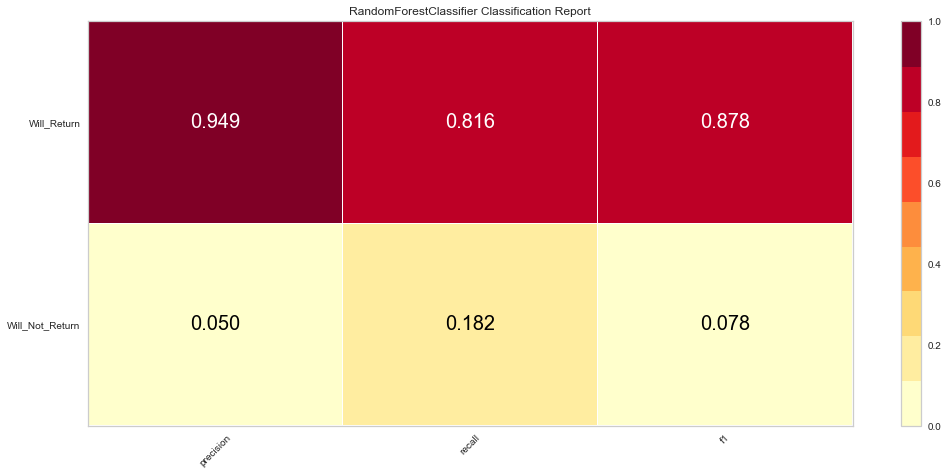

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


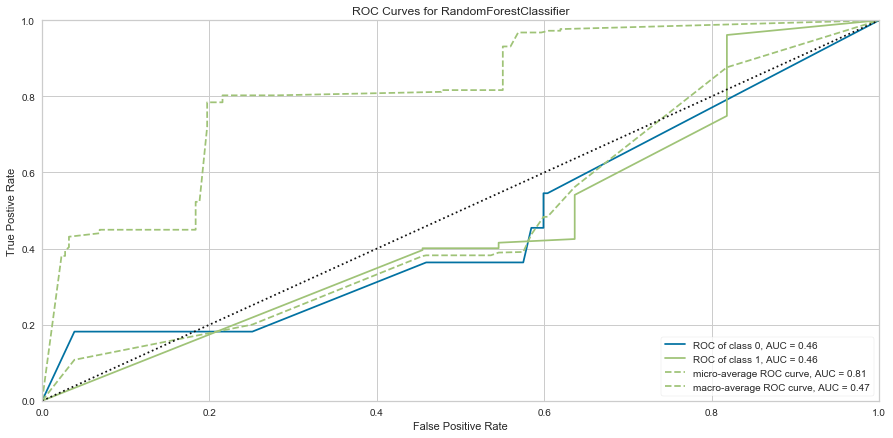

In [57]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

In [58]:
#This produces the same results as using the features importance values above a threshold of .08.

In [59]:
#try recursive feature elimination with the Naive Bayes
# Create a dataset that contains only the dummy features we want to feed throught he model
features_model = ['Ref_Adopter', 'Ref_Google', 'Ref_Social', 'Ref_Friend','Ref_News', 'Ref_Other', 'Dental', 
                  'Heartworm', 'Other', 'Spay/Neuter', 'TNR', 'Wellness']
data_model_X = df[df['target'] != -1][features_model]

#try recursive feature selection and re-running the model
# Instantiate the classification model 
model = BernoulliNB(fit_prior=False)

rfecv = RFECV(estimator=model, step=1, scoring="f1")
rfecv.fit(data_model_X, data_model_y)
rfecv.transform(data_model_X)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [60]:
data_model_X.columns[rfecv.support_]

Index(['Dental'], dtype='object')

In [61]:
#All of my other analysis pointed to Dental as one of the least important features so I am going to assume that this 
#method doesn't work well with Naive Bayes in this instance.

In [62]:
# OVerall, the best model to predict the likelihood of whether a vistor of the Community Clinic will return is Logisitic 
# weighted for imbalanced classes using the features Ref_Social, Other Service Types and Other Referral Types.

In [63]:
# Step 16
# Tune hyperparameters
from sklearn.model_selection import GridSearchCV

#split the data again and retrain the model with only these features
features_model = ['Ref_Social', 'Ref_Other', 'Other']
features = df[df['target'] != -1][features_model]
target = df[df['target'] !=-1]['target']

# Instantiate the classification model 
model = LogisticRegression(random_state=0, class_weight="balanced")

# split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size =0.3, random_state=11)

penalty = ['l1', 'l2']

C = np.logspace(0,4,10)
hyperparameters = dict(C=C, penalty=penalty)

gridsearch = GridSearchCV(model, hyperparameters, cv=5, verbose=1)

#fit grid search
best_model = gridsearch.fit(X_train, y_train)

#view best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('C:', best_model.best_estimator_.get_params()['C'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties,

Best Penalty: l2
C: 1.0


C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done 100 out of 100 |

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


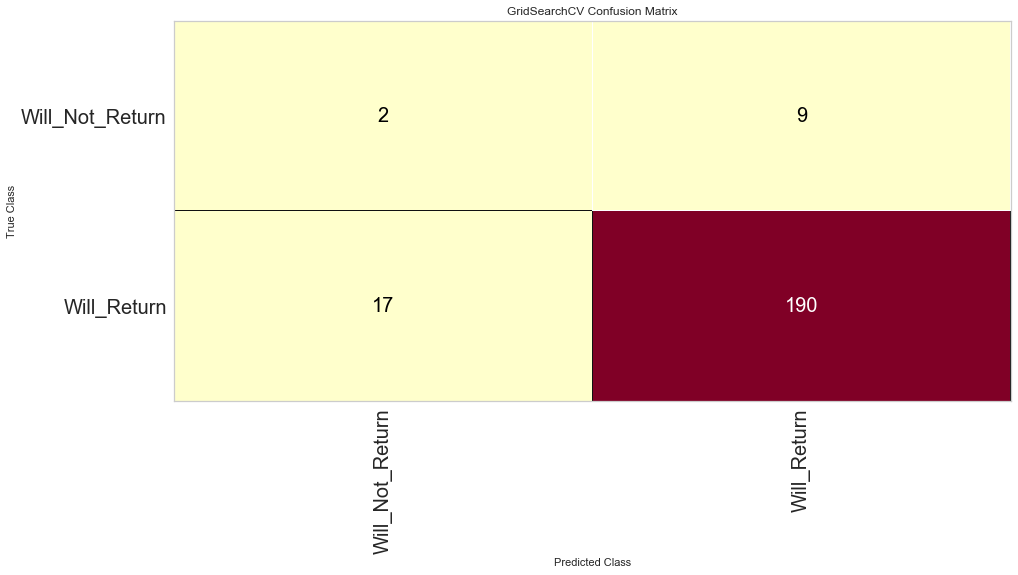

In [64]:
#View scores for the best model
#The ConfusionMatrix visualizer taxes a model
classes = ['Will_Not_Return','Will_Return']
cm = ConfusionMatrix(best_model, classes=classes, label_encoder={0: 'Will Not Return', 1: 'Will Return'}, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


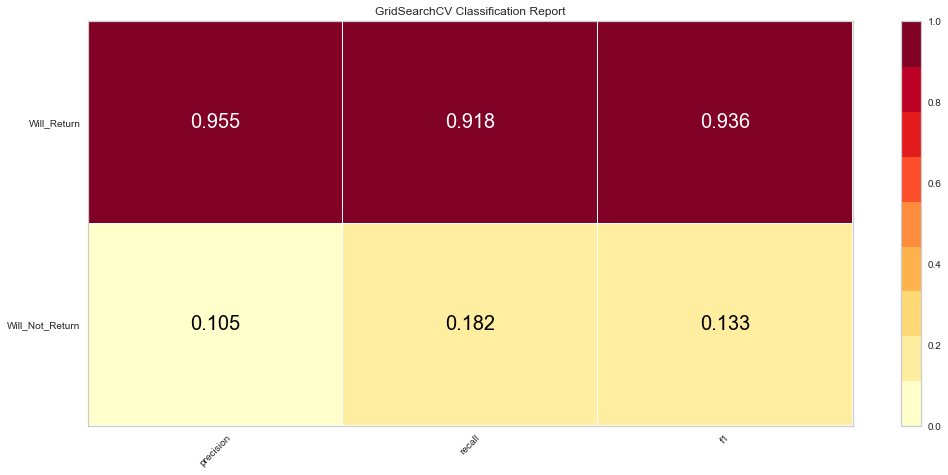

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


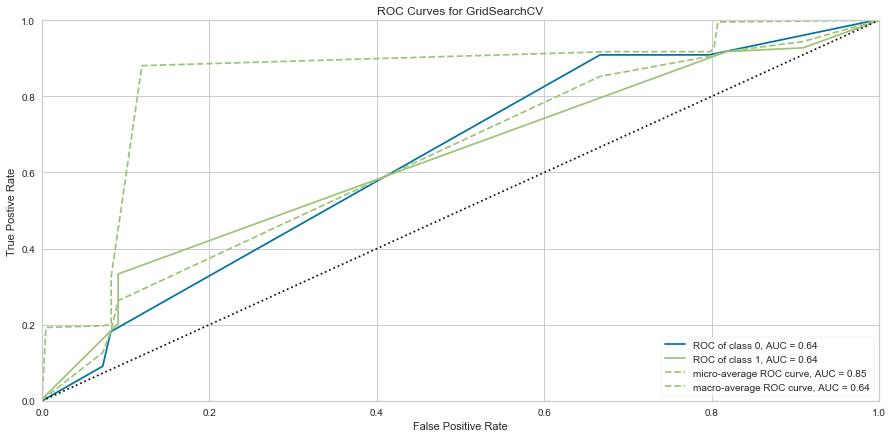

In [65]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(best_model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(best_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

In [66]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = best_model.predict(X_test)

print("Accuracy: {:0.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 88.07%
Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.18      0.13        11
           1       0.95      0.92      0.94       207

    accuracy                           0.88       218
   macro avg       0.53      0.55      0.53       218
weighted avg       0.91      0.88      0.90       218



In [67]:
print(df.groupby('WillReturn', as_index=False).count())     

  WillReturn  Respondent ID  Ref_Adopter  Ref_Google  Ref_Social  Ref_News  \
0    neutral             53           53          53          53        53   
1         no             28           28          28          28        28   
2        yes            697          697         697         697       697   

   Ref_Friend  Ref_Other  Service  Service_Other  ...  NotAtAllLikely  \
0          53         53       53             11  ...              53   
1          28         28       28              7  ...              28   
2         697        697      697             66  ...             697   

   Feedback  Other_Notes  target  Dental  Heartworm  Other  Spay/Neuter  TNR  \
0        39           11      53      53         53     53           53   53   
1        24            2      28      28         28     28           28   28   
2       416          144     697     697        697    697          697  697   

   Wellness  
0        53  
1        28  
2       697  

[3 rows x 24 col

In [68]:
#I'm curious to see if taking a random sample of "likely to return" observations will improve the model.
size = 28    # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]

sample_df = df.groupby('WillReturn', as_index=False).apply(fn)

sample_df.shape

(84, 24)

C:\Users\rvick\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


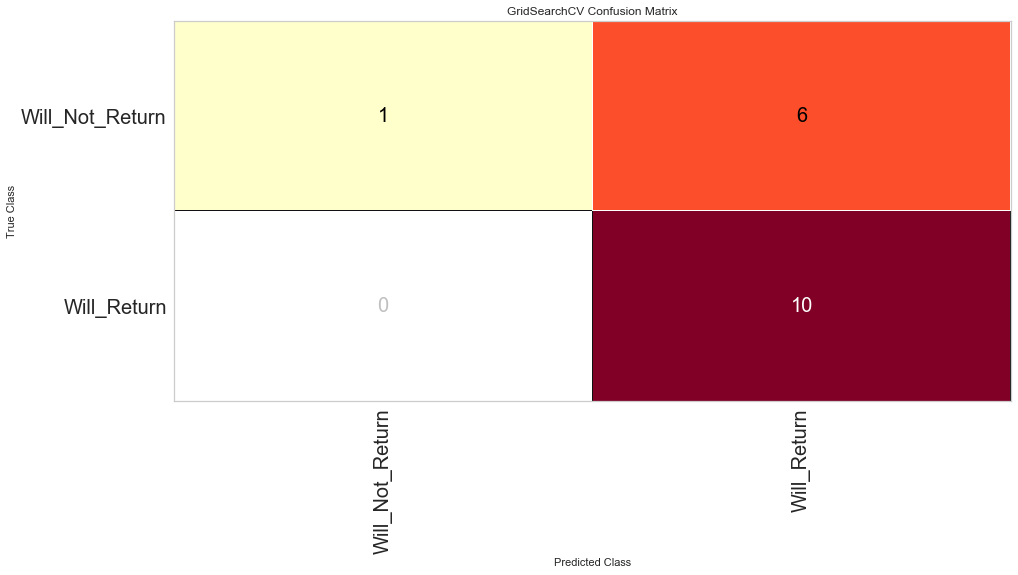

In [69]:
features_model = ['Ref_Social', 'Ref_Other', 'Other']
features = sample_df[sample_df['target'] != -1][features_model]
target = sample_df[sample_df['target'] !=-1]['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size =0.3, random_state=11)

classes = ['Will_Not_Return','Will_Return']
cm = ConfusionMatrix(best_model, classes=classes, label_encoder={0: 'Will Not Return', 1: 'Will Return'}, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

In [70]:
y_pred = best_model.predict(X_test)

print("Accuracy: {:0.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 64.71%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.62      1.00      0.77        10

    accuracy                           0.65        17
   macro avg       0.81      0.57      0.51        17
weighted avg       0.78      0.65      0.56        17



In [71]:
## I believe the dataset is too small to try to balance the dataset by random sampling.  
## As more survey results are collected, the model can be evaluated further.

In [72]:
#Step 17 
# Evaluate the comments left by those who said they would not return to find any consistent themes

import string 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

def preprocess(df):
    #remove punctuation
    print("   Removing punctuation...")
    df['newFeedback'] = df['Feedback'].apply(remove_punctuations)

    #apply lowercase and porter stemmer
    print("   Removing stopwords, applying lowercase, and porter stemmer...")
    porter = PorterStemmer()
    stop_words = stopwords.words('english')
    df['newFeedback'] = df['newFeedback'].apply(lambda x: ' '.join([porter.stem(word.lower()) for word in x.split()
                                                                        if word not in stop_words]))
    
    print("Completed Preprocessing")

In [73]:
#get comments from the respondents
noreturn_df = df[df['target'] == 0][['target', 'Feedback']].dropna()

print('Size: ', len(noreturn_df), '\n',
      'Shape: ', noreturn_df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 19 to 777
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   target    24 non-null     int64 
 1   Feedback  24 non-null     object
dtypes: int64(1), object(1)
memory usage: 576.0+ bytes
Size:  24 
 Shape:  None 



In [74]:
#preprocess the words by removing punctuation, stopwords and applying a porter stemmer
preprocess(noreturn_df)

   Removing punctuation...
   Removing stopwords, applying lowercase, and porter stemmer...
Completed Preprocessing


In [75]:
noreturn_df.head()

,target,Feedback,newFeedback
19,0,"They were great, but I have my own veterinaria...",they great i veterinarian i use dog i appreci ...
24,0,I have questions about some services listed on...,i question servic list receipt puppi return i ...
52,0,Prices for spay/neuter were different over the...,price spayneut differ phone person head wa cha...
138,0,This operation was done 6 days ago and my kitt...,thi oper done 6 day ago kitten still walk prop...
174,0,I came to the clinic after I had been out of t...,i came clinic i town week my husband home kitt...


In [76]:
#Use tfidfvectorizer to get the top 10 words that are in the comments.
tfidf = TfidfVectorizer(max_features=10)
feature_matrix = tfidf.fit_transform(noreturn_df['newFeedback'])

print(tfidf.vocabulary_)

{'dog': 2, 'vet': 8, 'like': 4, 'it': 3, 'my': 5, 'wait': 9, 'check': 1, 'time': 7, 'tech': 6, 'appoint': 0}


In [77]:
#knowing what I do about the clinic and seeing the ranking above, wait and time are ranked at the top which would lead me to believe that 
#wait times may have impacted their response.